In [1]:
%matplotlib inline
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [3]:
datafile = uproot.open("/mnt/Storage/gvicentini/ElectronDataset/Hits/eminus_hits_dn_0.root")

In [4]:
trueINFO = datafile["true_info"]
trueINFO_pd = trueINFO.pandas.df()
trueINFO_pd

,evtID,E,x,y,z,R
entry,,,,,,
0,0,4.747791,8290.779297,11995.618164,911.742859,14610.377930
1,1,3.566943,10731.096680,-10665.593750,8294.514648,17254.283203
2,2,0.525494,-8256.232422,-3160.362549,2119.616943,9090.986328
3,3,8.883169,3101.022949,-11927.612305,-7299.741699,14323.773438
4,4,4.359181,3229.798584,-7398.088867,-8300.032227,11578.163086
...,...,...,...,...,...,...
99995,99995,4.337835,6755.354492,3033.865723,12181.961914,14256.204102
99996,99996,3.728539,-3448.209229,11290.456055,11033.193359,16158.461914
99997,99997,5.171671,-581.555176,-11477.789062,-10039.052734,15259.764648


In [5]:
data = []

for i in range(0,100000):
    if trueINFO_pd.loc[i, 'x'] < 1000 and trueINFO_pd.loc[i, 'x'] > -1000 and trueINFO_pd.loc[i, 'y'] < 1000 and trueINFO_pd.loc[i, 'y'] > -1000 and trueINFO_pd.loc[i, 'z'] < 1000 and trueINFO_pd.loc[i, 'z'] > -1000 :
            data.append({'evtID': i, 'E': trueINFO_pd.loc[i, 'E'],
                       'x': trueINFO_pd.loc[i, 'x'],
                       'y': trueINFO_pd.loc[i, 'y'],
                       'z': trueINFO_pd.loc[i, 'z'],
                       'R': trueINFO_pd.loc[i, 'R']})
            
trueINFO_pd_0 = pd.DataFrame(data)
trueINFO_pd_0

,evtID,E,x,y,z,R
0,9179,3.683477,117.940811,-564.196167,-575.140747,814.256897
1,11227,8.320244,-212.369843,-360.378204,595.867249,728.032410
2,15515,9.172380,297.620331,-13.634849,492.909912,575.954834
3,16099,6.024513,604.706177,-899.583496,889.353882,1402.094971
4,25171,2.330376,-377.775208,1.164722,296.293762,480.109863
5,30640,8.638508,-321.205963,562.077759,83.892120,652.795959
6,33551,8.808425,-891.664673,-471.309570,511.621338,1130.908936
7,34687,3.708094,28.620100,-404.909851,-286.819946,497.027954
8,34794,3.924313,-86.332939,121.451859,333.879669,365.622162
9,35652,0.586537,954.629272,-691.640442,-124.237122,1185.376831


In [7]:
largePMT = datafile["lpmt_hits"]
ev9179 = largePMT.pandas.df(entrystart=9179, entrystop=9180)
ev9179.loc[9179]

,nHits,pmtID,hitTime,isDN
subentry,,,,
0,5001,9704,199.096039,False
1,5001,7318,173.033890,False
2,5001,11203,122.065376,False
3,5001,3842,110.814377,False
4,5001,1424,112.309471,False
...,...,...,...,...
4996,5001,17690,61.096581,True
4997,5001,17706,467.164154,True
4998,5001,17718,425.988403,True


In [8]:
def no_DN (frame):
    data = []

    i = frame.index[0][0]
    a = 0
    for j in range(0,len(frame.loc[i])): 
        if frame.loc[i, 'isDN'].loc[j] == False:
            a += 1
    for j in range(0,len(frame.loc[i])): 
        if frame.loc[i, 'isDN'].loc[j] == False and frame.loc[i, 'hitTime'].loc[j] < 300:
            data.append({'subentry': j, 'nHits': a,
                       'pmtID': frame.loc[i, 'pmtID'].loc[j],
                       'hitTime': frame.loc[i, 'hitTime'].loc[j] })
            
    frame_noDN = pd.DataFrame(data)
    return frame_noDN

In [9]:
ev9179_noDN = no_DN(ev9179)
ev9179_noDN

,subentry,nHits,pmtID,hitTime
0,0,4269,9704,199.096039
1,1,4269,7318,173.033890
2,2,4269,11203,122.065376
3,3,4269,3842,110.814377
4,4,4269,1424,112.309471
...,...,...,...,...
4148,4264,4269,7756,101.690834
4149,4265,4269,10539,147.308975
4150,4266,4269,3875,109.400795
4151,4267,4269,11827,289.672089


In [10]:
PMT_pos = datafile["lpmt_pos"]
PMT_pos_pd = PMT_pos.pandas.df()
PMT_pos_pd

,pmt_id,pmt_x,pmt_y,pmt_z
entry,,,,
0,0,1.049021e+03,0.000000,19171.320312
1,1,9.084785e+02,524.510315,19171.320312
2,2,5.245103e+02,908.478516,19171.320312
3,3,6.423399e-14,1049.020630,19171.320312
4,4,-5.245103e+02,908.478516,19171.320312
...,...,...,...,...
17734,17734,1.904750e+04,-2395.499268,-307.276520
17735,17735,1.910673e+04,-1865.088745,-307.276520
17736,17736,1.915119e+04,-1333.236816,-307.276520


In [11]:
def new_spherical (xyz):
    data = []
    for i in range(0, len(xyz)):
        r = np.sqrt(xyz.loc[i, 'pmt_x']**2 + xyz.loc[0,'pmt_y']**2 + xyz.loc[i, 'pmt_z']**2)
        theta = np.arccos((xyz.loc[i, 'pmt_z'])/r)
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = np.pi/2
        if xyz.loc[i, 'pmt_x'] == 0 and xyz.loc[i, 'pmt_y'] > 0:
            phi = 3*np.pi/2
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] >= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x']))
        if (xyz.loc[i, 'pmt_x'] > 0 and xyz.loc[i, 'pmt_y'] <= 0):
             phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) +2*np.pi
        elif (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] > 0) or (xyz.loc[i, 'pmt_x'] < 0 and xyz.loc[i, 'pmt_y'] < 0):
            phi = np.arctan((xyz.loc[i, 'pmt_y'])/(xyz.loc[i, 'pmt_x'])) + np.pi
        data.append({'pmt_id': i,
                    'pmt_r': r,
                    'pmt_theta': theta,
                    'pmt_phi': phi })
    rtp = pd.DataFrame(data)
    return rtp

In [12]:
PMT_spher_pd = new_spherical(PMT_pos_pd)
PMT_spher_pd

,pmt_id,pmt_r,pmt_theta,pmt_phi
0,0,19199.999136,0.054664,6.283185
1,1,19192.833447,0.047352,0.523599
2,2,19178.494039,0.027352,1.047198
3,3,19171.320312,0.000000,1.570796
4,4,19178.494039,0.027352,2.094395
...,...,...,...,...
17734,17734,19049.976396,1.586927,6.158078
17735,17735,19109.197230,1.586877,6.185879
17736,17736,19153.654386,1.586840,6.213681
17737,17737,19183.310731,1.586815,6.241483


In [13]:
def ev_map (ev):
    data = []
    for i in range (0, len(ev)):
        data.append({'pmt_id': ev.loc[:, 'pmtID'].loc[i], 
                 'pmt_theta': PMT_spher_pd.loc[ev.loc[:, 'pmtID'].loc[i], 'pmt_theta'],
                 'pmt_phi': PMT_spher_pd.loc[ev.loc[:, 'pmtID'].loc[i], 'pmt_phi'],
                 'hitTime': ev.loc[:, 'hitTime'].loc[i] })
    
    ev_map = pd.DataFrame(data)
    return ev_map

In [14]:
map9179 = ev_map (ev9179_noDN)
map9179

,pmt_id,pmt_theta,pmt_phi,hitTime
0,9704,3.045964,1.370269,199.096039
1,7318,1.157932,4.281463,173.033890
2,11203,2.564831,0.829855,122.065376
3,3842,0.631471,2.082629,110.814377
4,1424,0.051512,1.494790,112.309471
...,...,...,...,...
4148,7756,1.388834,3.892239,101.690834
4149,10539,2.634628,0.734727,147.308975
4150,3875,0.978118,3.247489,109.400795
4151,11827,2.971753,1.422608,289.672089


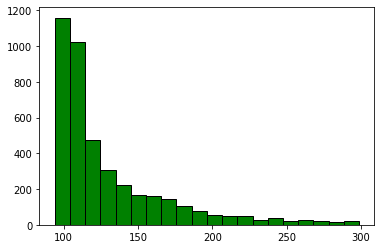

In [16]:
time9179 = map9179.loc[:, 'hitTime']
time9179
plt.hist(time9179, bins=20, ec='black', color='green')
plt.show()

In [17]:
def ev_mollweide (ev_map):
    # Set the coordinates for the input
    nside = 16
    npix = hp.nside2npix(nside)

    # Coordinates and the density field f
    thetas = PMT_spher_pd.loc[:, 'pmt_theta']
    phis = PMT_spher_pd.loc[:, 'pmt_phi']
    hitTime = ev_map.loc[:, 'hitTime']

    # Go from HEALPix coordinates to indices
    indices = hp.ang2pix(nside, thetas, phis)

    # Initate the map and fill it with the values
    hpxmap = np.zeros(npix, dtype=np.float)
    for i in range(len(ev_map)):
        hpxmap[indices[ev_map.loc[:, 'pmt_id'].loc[i]]]  = hitTime.loc[i]

    # Inspect the map
    hp.mollview(hpxmap)

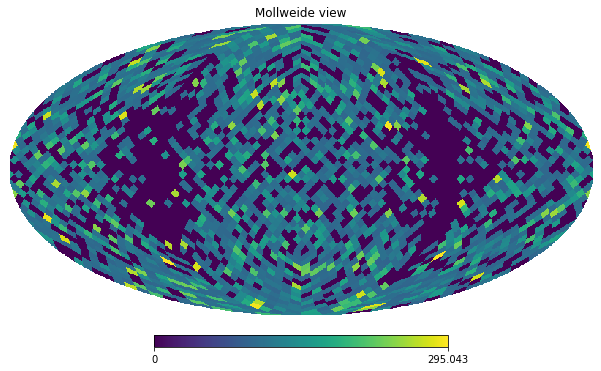

In [19]:
ev_mollweide(map9179)